In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#loading datasets
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many missing values : Gender,Married, Dependents, Self_Employed,LoanAmount, Loan_Amount_Term, Credit_History

As there are less missing values we can drop it

In [7]:
df = df.dropna()

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

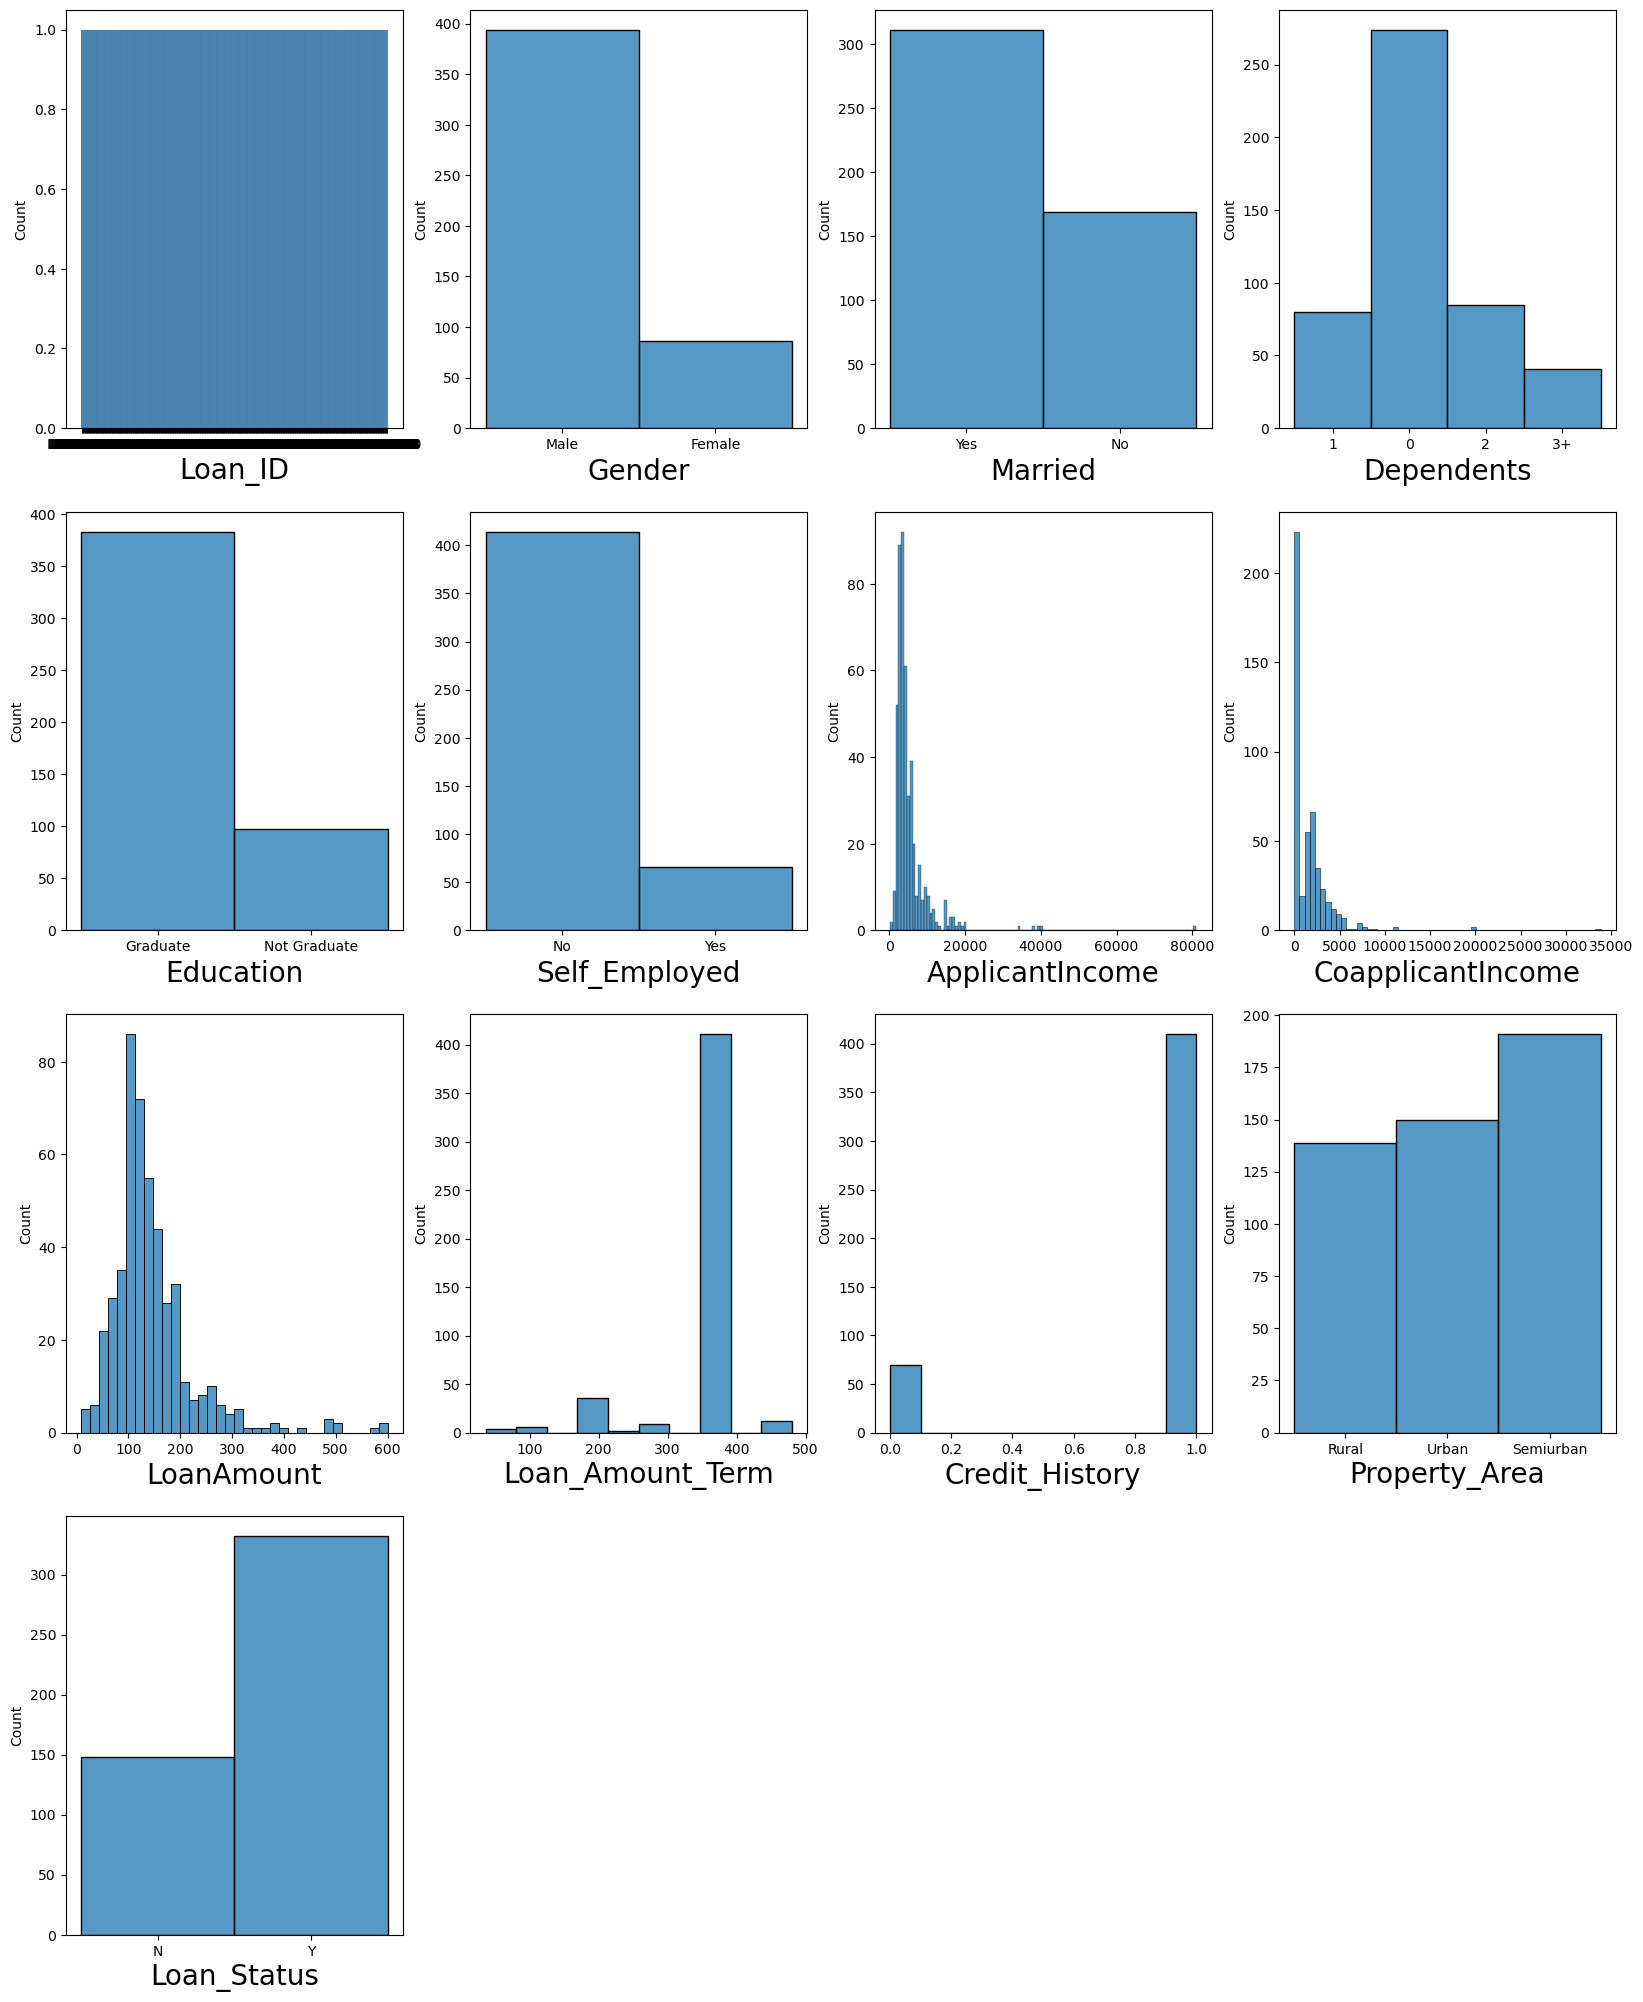

In [20]:
#Visualization:
# Lets see the distribution of data
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

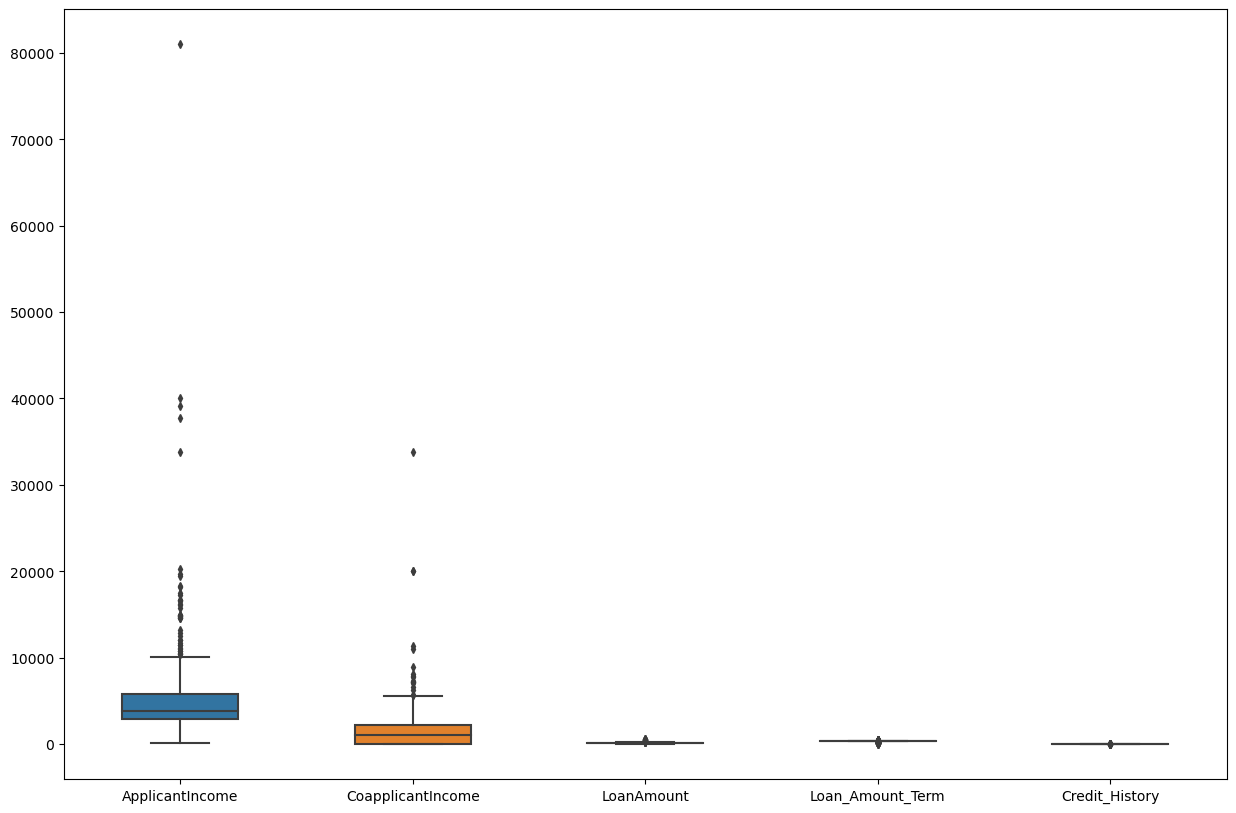

In [23]:
#Lets see th outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=4)

<AxesSubplot:>

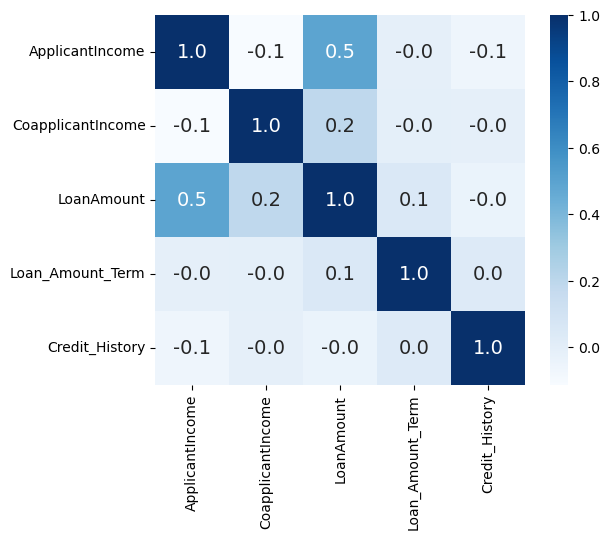

In [26]:
correlation = df.corr()
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f",annot = True, annot_kws={"size": 14}, cmap = "Blues")


<AxesSubplot:xlabel='Education', ylabel='count'>

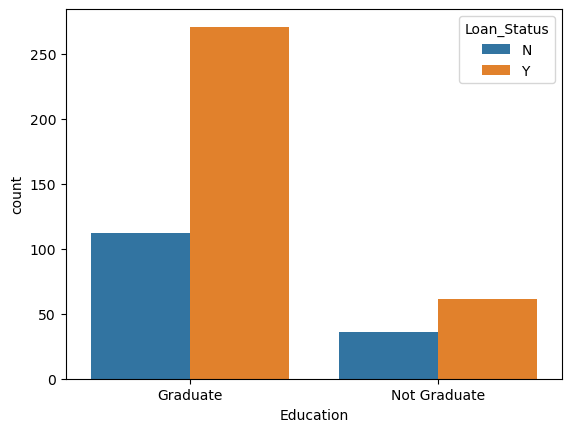

In [34]:
sns.countplot(x="Education", hue = "Loan_Status", data = df)
#This shows that. for Graduates,  no. of getting loan is higher.

<AxesSubplot:xlabel='Married', ylabel='count'>

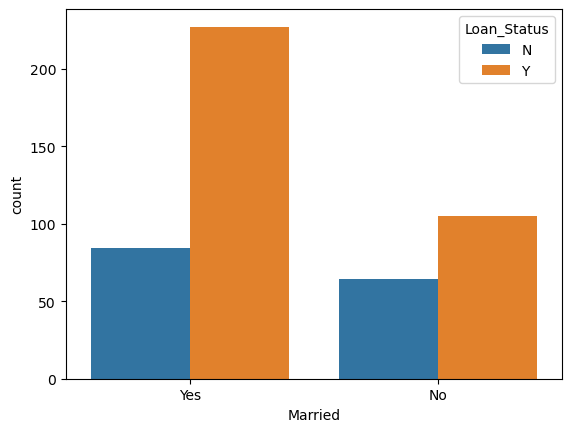

In [38]:
sns.countplot(x="Married", hue = "Loan_Status", data = df)
#This shows that. for married person,  no. of getting loan is higher.

<AxesSubplot:xlabel='Gender', ylabel='count'>

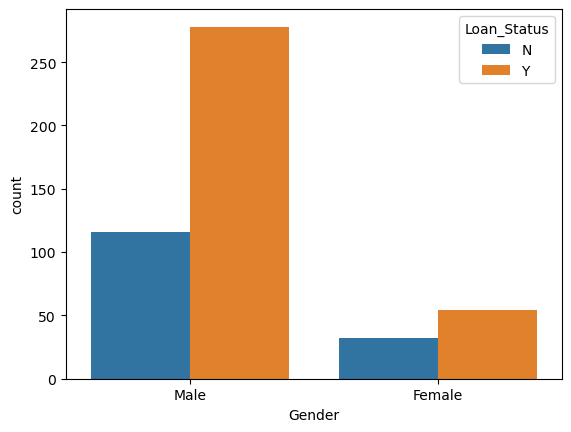

In [43]:
sns.countplot(x="Gender", hue = "Loan_Status", data = df)
#This shows that. for Male,  no. of getting loan is higher.

In [44]:
#Preprocessing
print(df["Gender"]. value_counts())
print(df["Married"].value_counts())
print(df["Education"].value_counts())
print(df[ "Self_Employed"].value_counts())
print(df["Property_Area"].value_counts())
print(df["Loan_Status"].value_counts())

Male      394
Female     86
Name: Gender, dtype: int64
Yes    311
No     169
Name: Married, dtype: int64
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
No     414
Yes     66
Name: Self_Employed, dtype: int64
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64
Y    332
N    148
Name: Loan_Status, dtype: int64


In [46]:
#Label Encoding : Instead of categorical value we convert it to numeric for easy process
df.replace({"Loan_Status":{"N":0, "Y":1}}, inplace =True)    #key:Value pair
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


In [48]:
df["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

0: there are no dependent person in family

1: there is 1 dependent in family

here, 3+ : It is not wise idea to feed more than 3 in our model so we give all above 3 to

In [49]:
# Replacing 3+ to 4
df = df.replace(to_replace = "3+", value = 4)

In [50]:
df["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [52]:
#convert categorical columns to numerical values
df.replace({
    'Married':{'No':0,'Yes':1},
    'Gender':{'Male':1,'Female':0},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [74]:
#Splitting Data into Dependent and Independet variable
# X = df.drop(columns = "Loan_Status")
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [75]:
y = df["Loan_Status"]

In [88]:
#Splitting into training and testing data set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.1 , stratify = y, random_state=5)

#purpose of stratify:: To split equal propotion in output variable

In [89]:
X.shape, x_train.shape, x_test.shape

((480, 11), (432, 11), (48, 11))

Model Training

In [90]:
from sklearn import svm
model = svm.SVC(kernel = "linear")

In [91]:
model.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [99]:
#Accuracy Score on training data
y_train_prediction = model.predict(x_train)

In [100]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score( x_train_prediction,y_train)
print("The Training Accuracy is : ", train_accuracy)

The Training Accuracy is :  0.7962962962962963


In [110]:
#Accuracy Score on test Data
y_test_prediction = model.predict(x_test)
test_Accuracy = accuracy_score(y_test,y_test_prediction)
print("The Test Accuracy is : ", test_Acc5uracy)

The Test Accuracy is :  0.8125
